In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/US_counties_case_death.csv')
data=df
data['date']=pd.to_datetime(data['date']).dt.date
data=data.groupby(['date'])['cases', 'deaths'].sum()
data.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.spines.bottom']=True
plt.rcParams['axes.spines.left']=True
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['legend.frameon']=False

### death from confirmed cases

In [12]:
import pyecharts.options as opts
from pyecharts.charts import Line
import matplotlib.colors as cs

line=Line()
line.add_xaxis(xaxis_data=data.index)
line.add_yaxis(series_name='cases',y_axis=data['cases'],symbol='emptyCircle',yaxis_index=0,is_symbol_show=True,color=cs.TABLEAU_COLORS['tab:blue'],label_opts=opts.LabelOpts(is_show=False),linestyle_opts=opts.LineStyleOpts(width=6))
line.add_yaxis(series_name='deaths',y_axis=data['deaths'],symbol='emptyCircle',yaxis_index=1,is_symbol_show=True,color=cs.TABLEAU_COLORS['tab:red'],label_opts=opts.LabelOpts(is_show=False),linestyle_opts=opts.LineStyleOpts(width=6))
line.extend_axis(xaxis_data=data.index,yaxis=opts.AxisOpts(type_='value',name='deaths',name_textstyle_opts=opts.LabelOpts(font_size=18),axislabel_opts=opts.LabelOpts(font_size=15)))
line.set_global_opts(title_opts=opts.TitleOpts(title='Cases & Death of COVID in US',pos_left='30%',title_textstyle_opts=opts.LabelOpts(font_size=20)),
                                               legend_opts=opts.LegendOpts(pos_top='5%',textstyle_opts=opts.LabelOpts(font_size=15)),
                                               datazoom_opts=[opts.DataZoomOpts(),opts.DataZoomOpts(type_='inside')],
                                               xaxis_opts=opts.AxisOpts(type_='category',axislabel_opts=opts.LabelOpts(font_size=15)),
                                               yaxis_opts=opts.AxisOpts(type_='value',name='cases',name_textstyle_opts=opts.LabelOpts(font_size=18),axistick_opts=opts.AxisTickOpts(is_show=True),splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(font_size=15)))
line.render_notebook()

### Death varies with date

In [33]:
from pyecharts.charts import Calendar

data_death=data.drop(['cases'],axis=1)
data_death=data_death-data_death.shift(1)
data_death=data_death.fillna(0)
death_list=[[date,death] for date,death in zip(data_death.index,data_death['deaths'].values)]

calender=Calendar(init_opts=opts.InitOpts(width='900px',height='300px'))
calender.add('',death_list,calendar_opts=opts.CalendarOpts(range_='2020',monthlabel_opts=opts.LabelOpts()))
calender.set_global_opts(title_opts=opts.TitleOpts(title='Death of COVID in US',pos_left='35%'),
                         visualmap_opts=opts.VisualMapOpts(max_=2800,min_=20,split_number=5,orient='horizontal',
                                                           range_color=[cs.TABLEAU_COLORS['tab:blue'],cs.TABLEAU_COLORS['tab:red']],
                                                           is_piecewise=True,pos_top='230px',pos_left='100px'))
calender.render_notebook()

### Cases varies with date

In [34]:
data_case=data.drop(['deaths'],axis=1)
data_case=data_case-data_case.shift(1)
data_case=data_case.fillna(0)
case_list=[[date,case] for date,case in zip(data_case.index,data_case['cases'].values)]

calender=Calendar(init_opts=opts.InitOpts(width='900px',height='300px'))
calender.add('',case_list,calendar_opts=opts.CalendarOpts(range_='2020',monthlabel_opts=opts.LabelOpts()))
calender.set_global_opts(title_opts=opts.TitleOpts(title='Cases of COVID in US',pos_left='35%'),
                         visualmap_opts=opts.VisualMapOpts(max_=76000,min_=0,split_number=5,orient='horizontal',
                                                           range_color=[cs.TABLEAU_COLORS['tab:blue'],cs.TABLEAU_COLORS['tab:red']],
                                                           is_piecewise=True,pos_top='230px',pos_left='100px'))
calender.render_notebook()

### CDC all deaths

In [35]:
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/Weekly_deaths_by_jurisdiction_and_race_cleaning.csv')
df.head()

,Jurisdiction,Week Ending Date,MMWRYear,MMWRWeek,Race/Ethnicity,Outcome,Number of Deaths
0,Alabama,01/10/2015,2015,1,Hispanic,All Cause,10.0
1,Alabama,01/09/2016,2016,1,Hispanic,All Cause,NaN
2,Alabama,01/07/2017,2017,1,Hispanic,All Cause,12.0
3,Alabama,01/06/2018,2018,1,Hispanic,All Cause,NaN
4,Alabama,01/05/2019,2019,1,Hispanic,All Cause,NaN


In [36]:
data_death=df.groupby(['MMWRYear','MMWRWeek','Outcome'],as_index=False)['Number of Deaths'].sum()
data_death=data_death.pivot_table(values='Number of Deaths',index=['MMWRYear','MMWRWeek'],columns='Outcome',aggfunc='sum')
data_death['Year']=data_death.droplevel(level=1).index
data_death['Week']=data_death.droplevel(level=0).index
data_death['Year']=data_death['Year'].astype('category')
data_death.head()

Outcome            All Cause  All Cause excluding COVID-19  COVID-19  Year  \
MMWRYear MMWRWeek                                                            
2015     1           62147.0                       62147.0       0.0  2015   
         2           61543.0                       61543.0       0.0  2015   
         3           58957.0                       58957.0       0.0  2015   
         4           57538.0                       57538.0       0.0  2015   
         5           57632.0                       57632.0       0.0  2015   

Outcome            Week  
MMWRYear MMWRWeek        
2015     1            1  
         2            2  
         3            3  
         4            4  
         5            5

Text(0.5, 1.0, 'Overall Death per week in US')

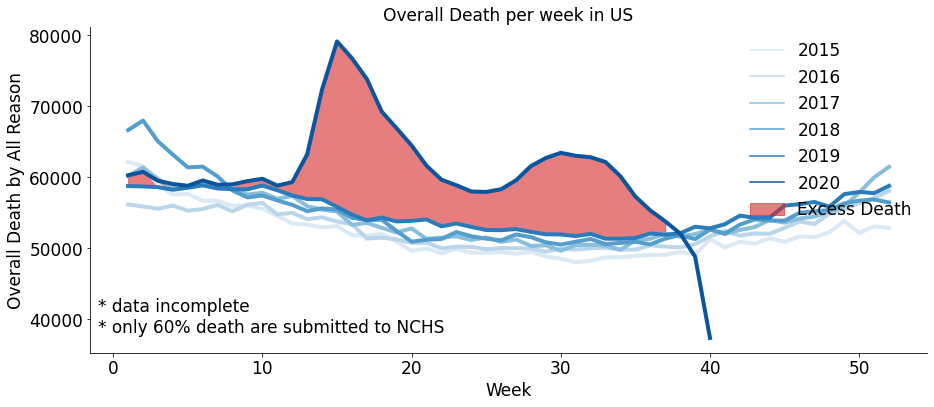

In [38]:
import seaborn as sns
import numpy as np

fontsize=17
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize
plt.rcParams['figure.figsize']=(15,6)

sns.lineplot(x='Week',y='All Cause',hue='Year',data=data_death,palette='Blues',lw=4)
week_num=40
where=np.array(data_death.loc[data_death['Year']==2020,'All Cause'][:week_num])>np.array(data_death.loc[data_death['Year']==2019,'All Cause'][:week_num])
plt.fill_between(data_death.loc[data_death['Year']==2020,'Week'][:week_num],
                 data_death.loc[data_death['Year']==2020,'All Cause'][:week_num],
                 data_death.loc[data_death['Year']==2019,'All Cause'][:week_num],
                 where=where,color='tab:red',alpha=0.6,label='Excess Death')
comment='* data incomplete\n* only 60% death are submitted to NCHS'
ax=plt.gca()
ax.text(.01,.05,comment,va='bottom',transform=ax.transAxes,fontsize=17)
plt.legend(loc=1)
plt.ylabel('Overall Death by All Reason')
plt.title('Overall Death per week in US')

### COVID Death

Text(0.5, 1.0, 'COVID Death per week in US')

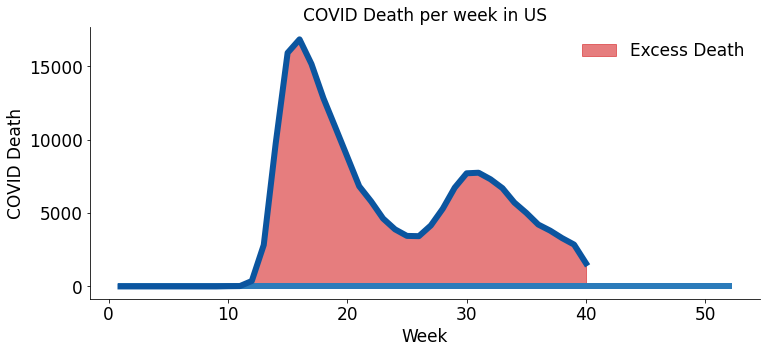

In [42]:
fontsize=17
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize
plt.rcParams['figure.figsize']=(12,5)

sns.lineplot(x='Week',y='COVID-19',hue='Year',data=data_death,palette='Blues',lw=6,legend=False)
week_num=40
plt.fill_between(data_death.loc[data_death['Year']==2020,'Week'][:week_num],
                 data_death.loc[data_death['Year']==2020,'COVID-19'][:week_num],
                 0,
                 color='tab:red',alpha=0.6,label='Excess Death')
plt.legend(loc=1)
plt.ylabel('COVID Death')
plt.title('COVID Death per week in US')

### Death by States

In [46]:
data_1=df.loc[(df['MMWRYear']==2019)|(df['MMWRYear']==2020)]
data_1=data_1.loc[data_1['MMWRWeek']<=37]
data_1=data_1.loc[data_1['Outcome']=='All Cause']
data_1=data_1.groupby(['Jurisdiction','MMWRWeek','MMWRYear'],as_index=False)['Number of Deaths'].sum()
data_1=data_1.pivot_table(values='Number of Deaths',index=['Jurisdiction','MMWRWeek'],columns='MMWRYear',aggfunc='sum')
data_1['States']=data_1.droplevel(level=1).index
data_1['Week']=data_1.droplevel(level=0).index
data_1['Year_increase %']=100*(data_1[2020]-data_1[2019])/data_1[2019]
data_1.head()

MMWRYear                 2019    2020   States  Week  Year_increase %
Jurisdiction MMWRWeek                                                
Alabama      1         1060.0  1066.0  Alabama     1         0.566038
             2         1075.0  1108.0  Alabama     2         3.069767
             3         1097.0  1020.0  Alabama     3        -7.019143
             4         1047.0  1034.0  Alabama     4        -1.241643
             5         1081.0  1012.0  Alabama     5        -6.382979

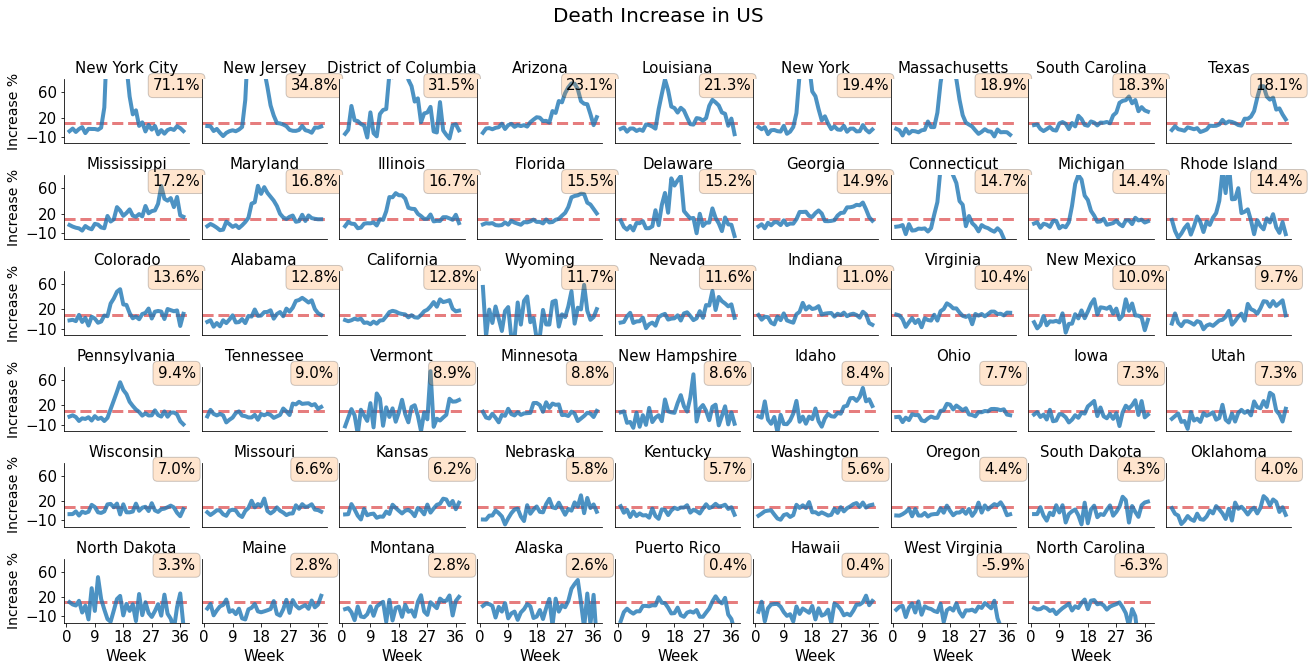

In [50]:
fontsize=15
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize

states=data_1.groupby(['States'])['Year_increase %'].sum().sort_values(ascending=False).index
fig=plt.figure(figsize=(22,10))
nrows,ncols=6,9
avg=data_1['Year_increase %'].mean()

for i,state in enumerate(states):
    ax=fig.add_subplot(nrows,ncols,i+1)
    state_data=data_1.loc[data_1['States']==state]
    ax.axhline(y=avg,color='tab:red',lw=3,alpha=.6,ls='--')
    ax.plot('Week','Year_increase %',data=state_data,color='tab:blue',alpha=.8,lw=4)
    mean_increase=state_data['Year_increase %'].mean()
    ax.text(.9,.9,'%.1f%%'%mean_increase,transform=ax.transAxes,fontsize=15,va='center',ha='center',bbox={'facecolor':'tab:orange','boxstyle':'round','alpha':.2})
    ax.set_title(state)
    ax.set_ylim((-20,80))
    if (i%ncols)!=0:
        ax.set_yticks([])
    else:
        ax.set_ylabel('Increase %',fontsize=14)
        ax.set_yticks([-10,20,60])
    if i<(nrows-1)*ncols:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0,38,9))
        ax.set_xlabel('Week')
fig.suptitle('Death Increase in US',fontsize=20,va='top')
plt.subplots_adjust(wspace=.1,hspace=.5)

### Death by race

In [51]:
data_2=df.loc[(df['MMWRYear']==2019)|(df['MMWRYear']==2020)]
data_2=data_2.loc[data_2['MMWRWeek']<=37]
data_2=data_2.loc[data_2['Outcome']=='All Cause']
data_2=data_2.groupby(['Race/Ethnicity','MMWRWeek','MMWRYear'],as_index=False)['Number of Deaths'].sum()
data_2=data_2.pivot_table(values='Number of Deaths',index=['Race/Ethnicity','MMWRWeek'],columns='MMWRYear',aggfunc='sum')
data_2['Races']=data_2.droplevel(level=1).index
data_2['Week']=data_2.droplevel(level=0).index
data_2['Year_increase %']=100*(data_2[2020]-data_2[2019])/data_2[2019]
data_2.head()

MMWRYear                   2019    2020     Races  Week  Year_increase %
Race/Ethnicity MMWRWeek                                                 
Hispanic       1         4897.0  5024.0  Hispanic     1         2.593425
               2         4954.0  5187.0  Hispanic     2         4.703270
               3         4878.0  5117.0  Hispanic     3         4.899549
               4         4750.0  5055.0  Hispanic     4         6.421053
               5         4847.0  5020.0  Hispanic     5         3.569218

Text(0.5, 0.98, 'Dead Increase USA')

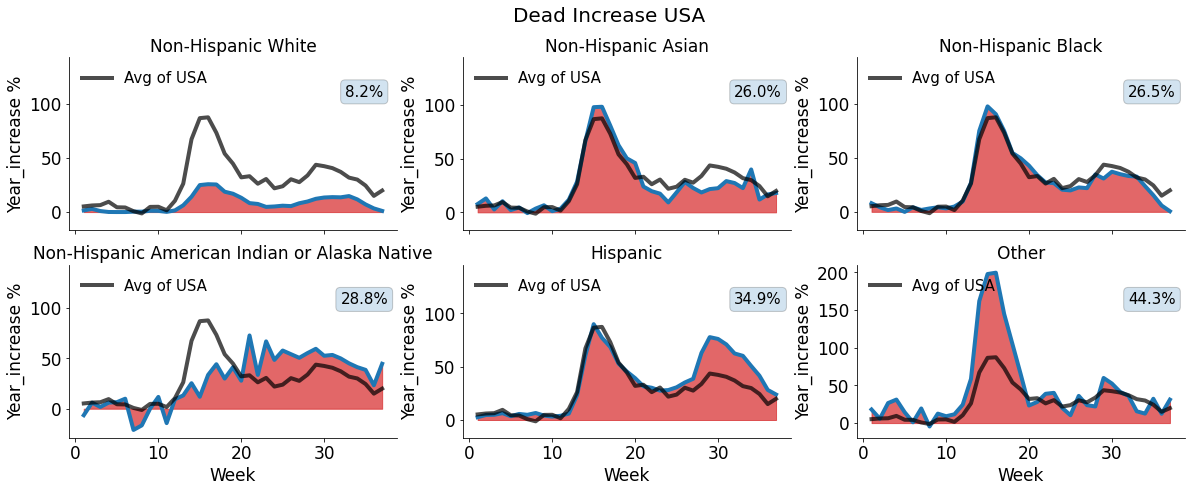

In [53]:
fontsize=17
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize
plt.rcParams['figure.figsize']=(20,7)

fig,axs=plt.subplots(2,3,sharex=True)
races=data_2.groupby('Races')['Year_increase %'].mean().sort_values().index
axs=axs.ravel()

for i,race in enumerate(races):
    ax=axs[i]
    race_data=data_2.loc[data_2['Races']==race]
    ax.plot(race_data['Week'],race_data['Year_increase %'],lw=4)
    ax.set_title(race)
    ax.fill_between(race_data['Week'],race_data['Year_increase %'],color='tab:red',alpha=.7)
    mean_increase=race_data['Year_increase %'].mean()
    ax.text(.9,.8,'%.1f%%'%mean_increase,transform=ax.transAxes,fontsize=15,va='center',ha='center',bbox={'facecolor':'tab:blue','boxstyle':'round','alpha':.2})
    sns.lineplot(x='Week',y='Year_increase %',color='k',err_style='bars',err_kws={'lw':0},data=data_2,alpha=.7,lw=4,label='Avg of USA',ax=ax)
    ax.legend(loc=2,fontsize=15)
fig.suptitle('Dead Increase USA',fontsize=20,va='top')

### Death by Age

In [57]:
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/Weekly_deaths_by_jurisdiction_and_age_clearning.csv')
data_3=df.loc[(df['Year']==2019)|(df['Year']==2020)]
data_3=data_3.loc[data_3['Week']<=37]
data_3=data_3.groupby(['Age Group','Week','Year'],as_index=False)['Number of Deaths'].sum()
data_3=data_3.pivot_table(values='Number of Deaths',index=['Age Group','Week'],columns='Year',aggfunc='sum')
data_3['Ages']=data_3.droplevel(level=1).index
data_3['Week']=data_3.droplevel(level=0).index
data_3['Year_increase %']=100*(data_3[2020]-data_3[2019])/data_3[2019]
data_3.head()

Year                2019    2020         Ages  Week  Year_increase %
Age Group   Week                                                    
25-44 years 1     2765.0  3008.0  25-44 years     1         8.788427
            2     2667.0  2875.0  25-44 years     2         7.799025
            3     2530.0  2829.0  25-44 years     3        11.818182
            4     2573.0  2796.0  25-44 years     4         8.666926
            5     2509.0  2757.0  25-44 years     5         9.884416

Text(0.5, 1.0, 'Dead Increase USA')

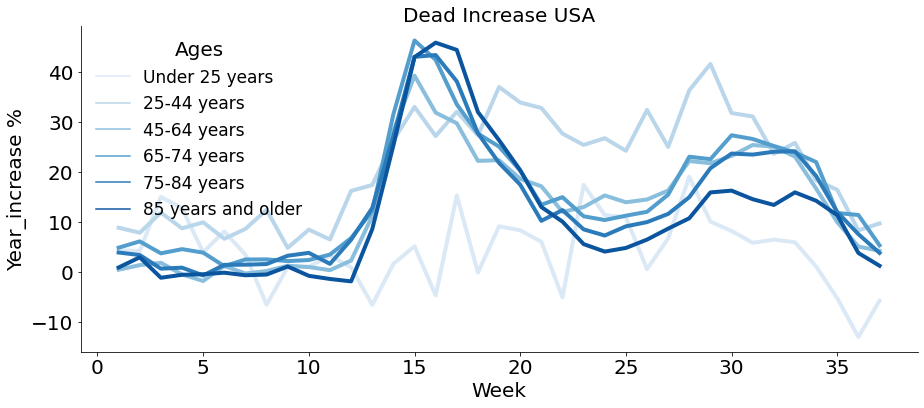

In [58]:
fontsize=20
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize
plt.rcParams['legend.fontsize']=17
plt.rcParams['figure.figsize']=(15,6)

hue_order=['Under 25 years','25-44 years','45-64 years','65-74 years','75-84 years','85 years and older']
sns.lineplot(x='Week',y='Year_increase %',hue='Ages',hue_order=hue_order,palette='Blues',data=data_3,lw=4)
plt.title('Dead Increase USA',fontsize=20, va='top')

### search engine

In [59]:
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/2020_US_daily_symptoms_dataset_cleaning.csv')
df.head().T

,0,1,2,3,4
country_region,United States,United States,United States,United States,United States
month,1,1,1,1,1
sub_region_1,Alaska,Alaska,Alaska,Alaska,Alaska
date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05
week,1,1,1,1,1
symptom:Asthma,2.04,2.49,2.41,2.85,1.83
symptom:Common cold,16.34,18.78,17.11,17.43,17.2
symptom:Hay fever,1.73,2.2,1.44,1.37,NaN
symptom:Headache,5.03,5.33,4.42,4.3,5.35
symptom:Fever,5.95,6.33,5.66,4.91,4.9


Text(0.5, 0.98, 'Daily Search Symptoms Trend by Google of USA')

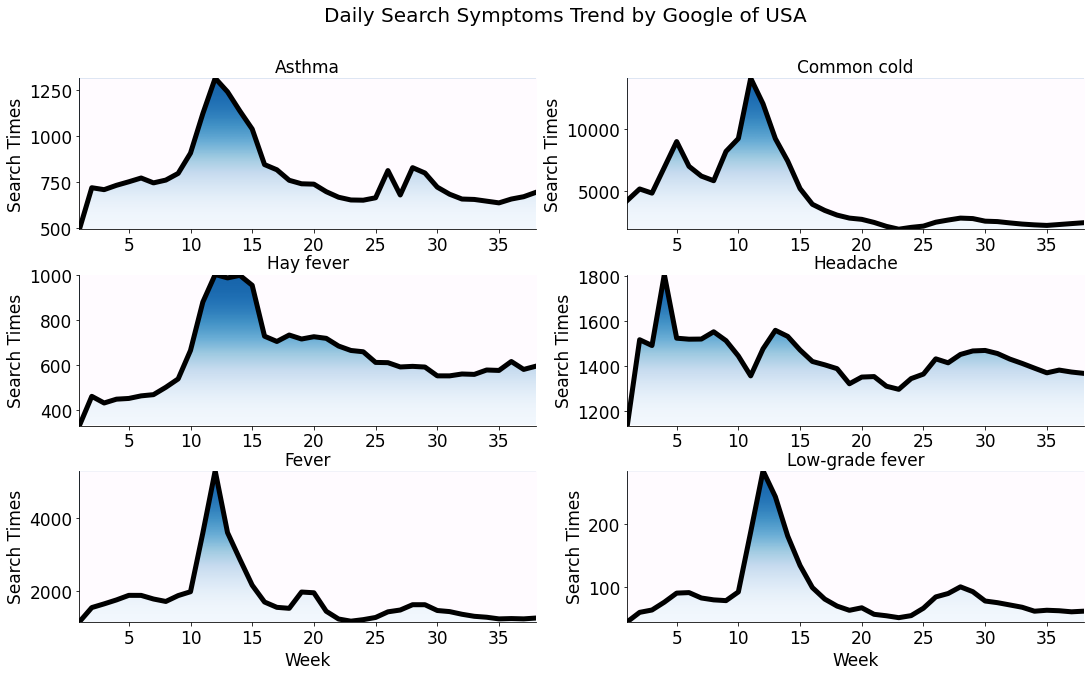

In [60]:
fontsize=17
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['figure.figsize']=(18,10)
symptoms=['symptom:Asthma','symptom:Common cold','symptom:Hay fever','symptom:Headache','symptom:Fever','symptom:Low-grade fever']

fig,axs=plt.subplots(3,2)
axs=axs.ravel()
for i,symptom in enumerate(symptoms):
    ax=axs[i]
    week_data=df.groupby(['week'])[symptom].sum()
    ax.plot(week_data.index,week_data,color='k',lw=5)

    xlim=xmin,xmax=week_data.index.min(),week_data.index.max()
    ylim=ymin,ymax=week_data.min(),week_data.max()
    ax.imshow(X=[[100,100],[0,0]],
              cmap=plt.cm.Blues,
              norm=None,
              extent=(xmin,xmax,ymin,ymax),
              aspect='auto',
              interpolation='bicubic',
              vmin=1,
              vmax=120)
    ax.fill_between(x=week_data.index,y1=week_data,y2=week_data.max(),color='#FFFBFF')
    ax.set_title(symptom.split(':')[1])
    ax.set_ylabel('Search Times')
    if i >= 4:
        ax.set_xlabel('Week')

plt.subplots_adjust(wspace=0.2,hspace=0.3)
fig.suptitle('Daily Search Symptoms Trend by Google of USA',fontsize=20,va='top')

### Restuarants behavior

In [61]:
df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/Seated_diner_data.csv')
df=df.loc[df['Type']=='state']
df=df.melt(id_vars=['Type','Name'],value_name='Seated Percent')
df=df.rename(columns={'variable':'Date'})
df['Date']=pd.to_datetime(df['Date']).dt.date
df.head()

,Type,Name,Date,Seated Percent
0,state,Alabama,2020-02-18,-14.0
1,state,Alberta,2020-02-18,2.0
2,state,Arizona,2020-02-18,0.0
3,state,Baja California Sur,2020-02-18,-6.0
4,state,British Columbia,2020-02-18,8.0


Text(0.5, 1.0, 'Seated Percent Compared to Last Year by COVID of USA')

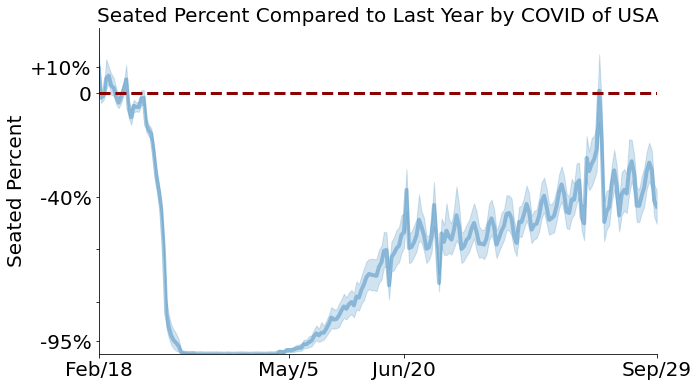

In [63]:
from datetime import date

fontsize=20
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize

fig,ax=plt.subplots(1,1,figsize=(10,6))
sns.lineplot(x='Date',y='Seated Percent',legend=False,alpha=.4,lw=4,data=df,ax=ax)
start_date=date(2020, 2, 19)
mid_date1=date(2020, 5, 5)
mid_date2=date(2020, 6, 20)
end_date=date(2020, 9, 29)

plt.xticks([start_date, mid_date1, mid_date2, end_date],['Feb/18', 'May/5', 'Jun/20', 'Sep/29'])
plt.xlim(start_date, end_date)
plt.yticks([-95,-80,-60,-40,0,10,40],['-95%', '', '', '-40%', 0, '+10%', ''])
plt.ylim(-100,25)
plt.axhline(y=0,color='darkred',lw=3,ls='--')
plt.xlabel('')
plt.title('Seated Percent Compared to Last Year by COVID of USA')

### CA and FL

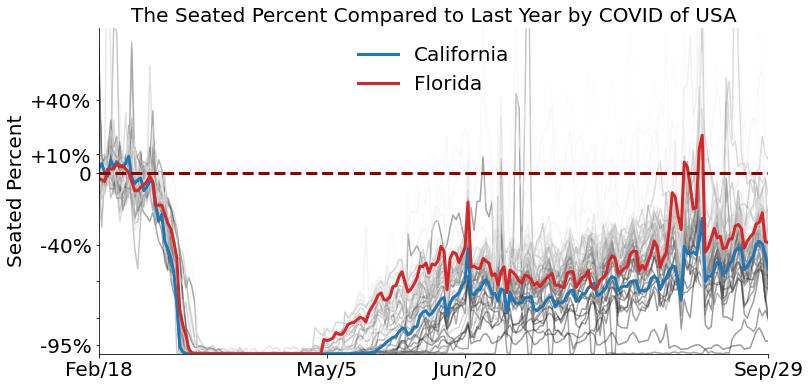

In [64]:
show_states=['California', 'Florida']
colors=['tab:blue','tab:red']

fig,ax=plt.subplots(1,1,figsize=(12, 6))
hue_order=df.groupby(['Name'])['Seated Percent'].mean().sort_values().index
sns.lineplot(x='Date',y='Seated Percent',hue='Name',hue_order=hue_order,legend=False,palette='gray',alpha=.4,data=df,ax=ax)
for i,show_state in enumerate(show_states):
    plt.plot(df.loc[df['Name']==show_state,'Date'],
             df.loc[df['Name']==show_state,'Seated Percent'],
             lw=3,label=show_state,color=colors[i])

start_date=date(2020, 2, 19)
mid_date1=date(2020, 5, 5)
mid_date2=date(2020, 6, 20)
end_date=date(2020, 9, 29)

plt.xticks([start_date, mid_date1, mid_date2, end_date],['Feb/18', 'May/5', 'Jun/20', 'Sep/29'])
plt.xlim(start_date,end_date)
plt.yticks([-95,-80,-60,-40,0,10,40],['-95%','','','-40%',0,'+10%','+40%'])
plt.ylim(-100,80)
plt.axhline(y=0,color='darkred',lw=3,ls='--')
plt.xlabel('')
plt.title('The Seated Percent Compared to Last Year by COVID of USA')
plt.legend()
plt.show()